In [2]:
pip install wikipedia-api

In [3]:
import wikipediaapi
import requests
import pandas as pd
from bs4 import BeautifulSoup

We are scraping information from the Wikipedia page on the list of countries and dependencies by population and convert the relevant HTML table into a Pandas DataFrame

In [7]:
# Scraping
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")
print("Webpage opened successfully...")

# Initialize a BeautifulSoup
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


Retrieved the HTML content of the Wikipedia page, load it into BeautifulSoup for parsing, and print messages to indicate successful execution of these steps.

In [8]:
# Find the table with the desired class
countrytable = bs.find('table', {'class': "wikitable"})

# Convert the HTML table to a Pandas DataFrame
userdata = pd.read_html(str(countrytable))[0]

# Display the DataFrame
print(userdata.head())

# Save the raw data to a CSV file
raw_data_file = "population_raw_data.csv"
userdata.to_csv(raw_data_file, index=False)

# Save the processed data to a CSV file
processed_data_file = "population_processed_data.csv"
userdata.to_csv(processed_data_file, index=False)

  Unnamed: 0 Country / Dependency  Population % of world         Date  \
0          –                World  8074600000       100%  30 Nov 2023   
1          1                China  1411750000        NaN  31 Dec 2022   
2          2                India  1392329000        NaN   1 Mar 2023   
3          3        United States   334233854        NaN   1 Jan 2023   
4          4            Indonesia   279118866        NaN   1 Jul 2023   

  Source (official or from the United Nations) Unnamed: 6  
0                             UN projection[3]        NaN  
1                         Official estimate[4]        [b]  
2                       Official projection[5]        [c]  
3                         Official estimate[7]        [d]  
4                National annual projection[8]        NaN  


Finding a specific HTML table on the Wikipedia page, converting it into a Pandas DataFrame, displaying the first few rows of the DataFrame, and saving both the raw and processed data to CSV files.

In [12]:
# Display the processed DataFrame
userdata = pd.read_html(str(countrytable))
userdata = pd.DataFrame(userdata[0])
userdata

,Unnamed: 0,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations),Unnamed: 6
0,–,World,8074600000,100%,30 Nov 2023,UN projection[3],NaN
1,1,China,1411750000,NaN,31 Dec 2022,Official estimate[4],[b]
2,2,India,1392329000,NaN,1 Mar 2023,Official projection[5],[c]
3,3,United States,334233854,NaN,1 Jan 2023,Official estimate[7],[d]
4,4,Indonesia,279118866,NaN,1 Jul 2023,National annual projection[8],NaN
...,...,...,...,...,...,...,...
237,–,Tokelau (NZ),1647,NaN,1 Jan 2019,2019 Census [233],NaN
238,–,Niue,1549,NaN,1 Jul 2021,National annual projection[183],NaN
239,195,Vatican City,764,NaN,26 Jun 2023,Official figure[234],[af]
240,–,Cocos (Keeling) Islands (Australia),593,NaN,30 Jun 2020,2021 Census[235],NaN


In this part of the code we are displaying the processed DataFrame after reading it from the HTML table.

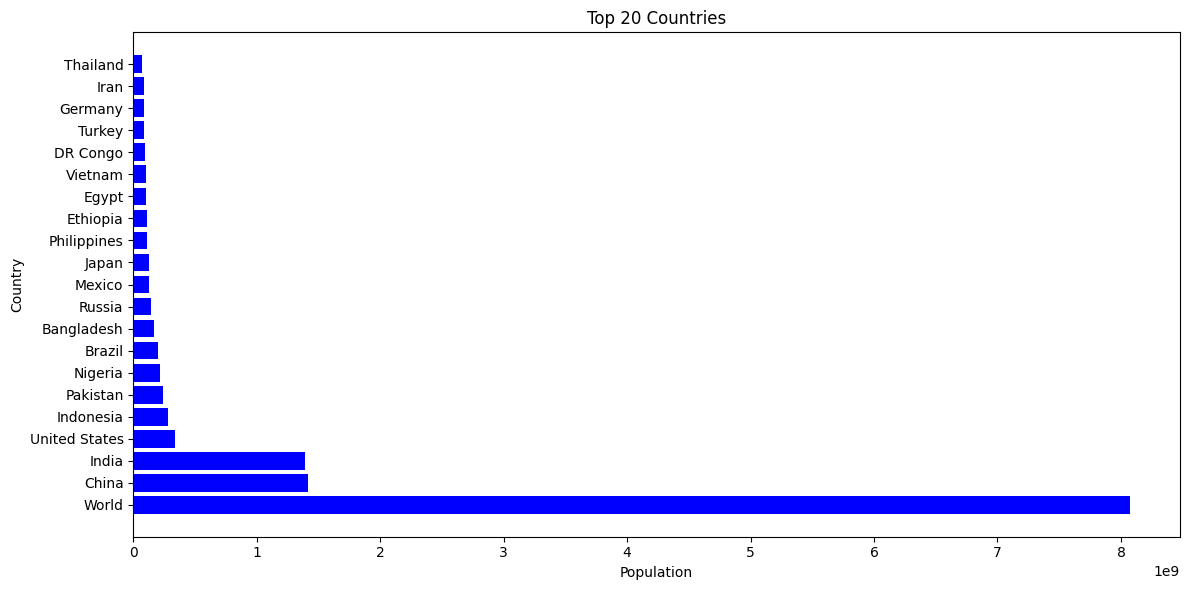

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
world_df = pd.read_csv("population_raw_data.csv")

# Take the top 50 movies
top_20_countries = world_df.head(21)

Country = top_20_countries['Country / Dependency']
Population = top_20_countries['Population']

# Create a bar graph comparing ratings by genre
plt.figure(figsize=(12, 6))
plt.barh(Country, Population, color='b')
plt.xlabel('Population')
plt.ylabel('Country')
plt.title('Top 20 Countries')
plt.tight_layout()

# Show the graph
plt.show()


Using the Matplotlib library to create and display a horizontal bar graph comparing the populations of the top 19 countries and the wolrds population.


The accuracy and relevance of this dataset and visualization are critical for illustrating reliable conclusions and assessing the source's reliability. Furthermore, their representativeness is important because it determines how well the data represents the population I am presenting. The more representative the data, the greater its accuracy and relevance. Additionally, what I found interesting from this data is Iran being in the top 20 countries highly populated. Doing further research, this is because When the Iranian monarchy was overthrown, the leaders of the new Islamic republic drew attention to a new national agenda, which was population growth.